# Build and Tune Deep Learning Models uusing Keras 

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential 

# Creating A Keras Model

In [2]:
predictors = np.loadtxt(r'C:\Users\muham\Downloads\divorce.csv', delimiter=',')

In [3]:
predictors

array([[ 1.,  2.,  3., ..., 53., 54.,  0.],
       [ 2.,  2.,  4., ...,  2.,  1.,  1.],
       [ 4.,  4.,  4., ...,  2.,  2.,  1.],
       ...,
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  1.,  0.],
       [ 0.,  0.,  0., ...,  3.,  1.,  0.]])

In [4]:
n_cols = predictors.shape[1]

In [5]:
model = Sequential()

In [6]:
model.add(Dense(100.9, activation='relu'))

In [7]:
model.add(Dense(1))

# Forward Propogation code

In [8]:
input_data = np.array([2,3])

In [9]:
weights = { 'node0': np.array([1,1]),
            'node1': np.array([-1,1]),
            'output': np.array([2,-1])}

In [10]:
node_0_value = (input_data * weights['node0']).sum()

In [11]:
node_1_value = (input_data * weights['node1']).sum()

In [12]:
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [13]:
output = (hidden_layer_values * weights['output']).sum()
print(output)

9


# Activiation Function

In [14]:
input_data1 = np.array([-1,2])

In [15]:
weights1 = { 'node0': np.array([3,3]),
            'node1': np.array([1,5]),
            'output': np.array([2,-1])}

In [16]:
node_0_input = (input_data1 * weights1['node0']).sum()

In [17]:
node_0_output = np.tanh(node_0_input)

In [18]:
node_1_input = (input_data1 * weights1['node1']).sum()

In [19]:
node_1_output = np.tanh(node_1_input)

In [20]:
hidden_layer_outputs = np.array([node_0_output, node_1_output])
print(hidden_layer_outputs)

[0.99505475 0.99999997]


In [21]:
output = (hidden_layer_outputs * weights1['output']).sum()
print(output)

0.9901095378334199


# Calculate with a Relu Function

In [22]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_00_input = (input_data * weights['node0']).sum()
node_00_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_11_input = (input_data * weights['node1']).sum()
node_11_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

0.9901095378334199


In [23]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[8, 12]


# Multi-layer Networks

In [24]:
# i DIDNT CREATE MORE NODES HERE THATS WHY THE PREDICTION IS COMING ZERO
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node1']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node1']).sum()
    node_1_1_output =  relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

0


# The Need for Optimization

In [25]:
def predict_with_network1(input_data, weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1']).sum()
    node_1_1_output =  relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network1(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network1(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

27
12


# How to calculate slope and update weights

In [26]:
weights = np.array([1,2])
input_data =  np.array([3,4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error =  preds - target
print(error)

5


In [27]:
gradient =  2*input_data*error
gradient

array([30, 40])

In [28]:
weights_updated = weights - learning_rate*gradient
preds_updated = (weights_updated * input_data).sum()
errors_updated = preds_updated - target
print(errors_updated)

2.5


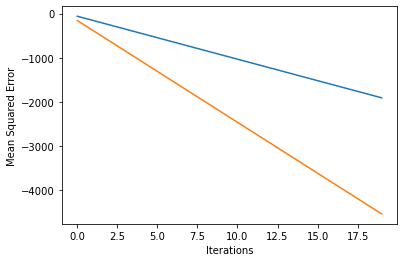

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
n_updates = 20
mse_hist = []
weights = np.array([2,3])
# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = gradient*input_data*target
    
    # not correct
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = input_data*target*weights
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# compile and fitting a model

In [30]:
# Creating A Keras Model
predictors1 = np.loadtxt(r'C:\Users\muham\Downloads\divorce.csv', delimiter=',')

target = 1.
target_o = np.array(target)
# if data is not numericals
predictors = np.asarray(predictors1).astype('float32')                                                                    
n_cols = predictors1.shape[1]
model1 = Sequential()
model1.add(Dense(100.9, activation='relu'))
model1.add(Dense(100.9, activation='relu'))
model1.add(Dense(1))
# Adam is a good optimizder choice
model1.compile(optimizer='Adam', loss='mean_squared_error')
# we can then fit a model

In [31]:
data = pd.read_csv(r'C:\Users\muham\Downloads\shot_logs.csv')

In [32]:
data.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [33]:
data.drop(['MATCHUP', 'W', 'LOCATION', 'GAME_CLOCK', 'SHOT_RESULT', 'CLOSEST_DEFENDER', 'player_name'], axis=1, inplace=True)

In [34]:
data.dtypes

GAME_ID                         int64
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_id                       int64
dtype: object

In [35]:
# Classification Models
from keras.utils.np_utils import to_categorical
predictors1 = data.drop(['SHOT_DIST'], axis=1)
predictors = np.asarray(predictors1) 
target = data['SHOT_DIST']
n_cols = predictors.shape[1]
model1 = Sequential()
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(2, activation='softmax'))
# Adam is a good optimizder choice
model1.compile(optimizer='adam', loss='categorical_crossentropy', 
               metrics=['accuracy'])
# we can then fit a model

In [36]:
df = pd.read_csv(r'C:\Users\muham\Downloads\train (3).csv')

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df.Age.fillna(df.Age.mode, inplace=True)

In [39]:
df.Cabin.fillna(df.Cabin.mode, inplace=True)

In [40]:
df.Embarked.fillna(df.Embarked.mode, inplace=True)

In [41]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [43]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = df.Survived
n_cols = df.shape[0]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
# v = model.fit(df, target)

# Saving, Reloading and Using Model

In [ ]:
# from keras.models import load_model
# model.save('model_file.h5')
# my_model = load_ model('my_model.h5')
# pred = my_model.predict(data to predict with)
# prob_true = pred[:,1]

# Stochastic Gradient Descent

In [50]:
def get_new_model(input_shape):
    model = Sequential()
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [64]:
from keras.optimizers import SGD 
lr_to_test = [.000001, 0.01, 1]
# loop over learning rates
# for lr in lr_to_test:
    # model = get_new_model(input_shape=input_shape)
    #my_optimizer = SGD(lr=lr)
    #model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')  
    # we can then fit the model

# Model Validation

In [66]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

In [67]:
# Fit the model
# Model.compile(predictors, target, validation_split=0.3, nb_epoch=20,call_backs =[early_stopping_monitor])

In [ ]:
# Experimenting with wider networks

In [68]:
# Define early_stopping_monitor
##early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
##model_2 = Sequential()

# Add the first and second layers
##model_2.add(Dense(100, activation='relu', input_shape=input_shape))
##model_2.add(Dense(100, activation='relu'))

# Add the output layer
##model_2.add(Dense(2, activation='softmax'))

# Compile model_2
##model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
##model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
##model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
##plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
##plt.xlabel('Epochs')
##plt.ylabel('Validation score')
##plt.show()

In [69]:
# Stepping Up to Images 
# Building your own Digit recognition Model
# Create the model: model
## model = Sequential()

# Add the first hidden layer
##model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
##model.add(Dense(50, activation='relu'))

# Add the output layer
##model.add(Dense(10, activation='softmax'))

# Compile the model
##model.compile(optimizer='adam',
              ##loss='categorical_crossentropy',
              ##metrics=['accuracy'])

# Fit the model
##model.fit(X, y, validation_split=0.3)
